# **Rec_sys_apriori**

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

In [131]:
df = pd.read_csv('Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [132]:
len(df)

38765

(array([1.008e+04, 2.698e+03, 1.390e+03, 3.440e+02, 1.750e+02, 8.000e+01,
        1.450e+02, 5.000e+01, 0.000e+00, 1.000e+00]),
 array([ 2. ,  2.9,  3.8,  4.7,  5.6,  6.5,  7.4,  8.3,  9.2, 10.1, 11. ]),
 <BarContainer object of 10 artists>)

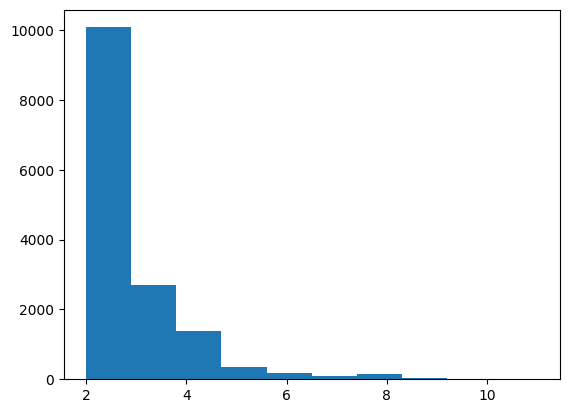

In [133]:
dist = [len(g) for k, g in df.groupby(['Member_number', 'Date'])]
plt.hist(dist)

In [134]:
df['itemDescription'].value_counts() 

itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64

In [135]:
data = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list)
print(data.head()) 

Member_number  Date      
1000           15-03-2015    [sausage, whole milk, semi-finished bread, yog...
               24-06-2014                    [whole milk, pastry, salty snack]
               24-07-2015                       [canned beer, misc. beverages]
               25-11-2015                          [sausage, hygiene articles]
               27-05-2015                           [soda, pickled vegetables]
Name: itemDescription, dtype: object


In [136]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
transactions_matrix = te.fit_transform(data)
encoded_df = pd.DataFrame(transactions_matrix, columns=te.columns_)

encoded_df = encoded_df.astype(int)

print(encoded_df.head())

   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                      0         0                 0                 0   
1                      0         0                 0                 0   
2                      0         0                 0                 0   
3                      0         0                 0                 0   
4                      0         0                 0                 0   

   baby cosmetics  bags  baking powder  bathroom cleaner  beef  berries  ...  \
0               0     0              0                 0     0        0  ...   
1               0     0              0                 0     0        0  ...   
2               0     0              0                 0     0        0  ...   
3               0     0              0                 0     0        0  ...   
4               0     0              0                 0     0        0  ...   

   turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0 

In [137]:
apr_model = apriori(encoded_df, min_support=0.001, use_colnames=True)

apr_model.sort_values(by='support', ascending=False)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
146,0.157923,(whole milk)
90,0.122101,(other vegetables)
109,0.110005,(rolls/buns)
123,0.097106,(soda)
147,0.085879,(yogurt)
...,...,...
344,0.001002,"(margarine, chicken)"
201,0.001002,"(bottled beer, chicken)"
202,0.001002,"(chocolate, bottled beer)"
516,0.001002,"(pastry, hamburger meat)"


In [138]:
rules = association_rules(apr_model, metric="confidence", min_threshold=0.1,num_itemsets=3)

rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 

rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
129,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,1.0,0.000563,1.131541,0.384877,0.009065,0.116250,0.132562
121,"(rolls/buns, sausage)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,1.0,0.000292,1.069304,0.258214,0.007007,0.064813,0.109847
126,"(sausage, soda)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,1.0,0.000130,1.026642,0.122281,0.006568,0.025951,0.093273
99,(semi-finished bread),(whole milk),0.009490,0.157923,0.001671,0.176056,1.114825,1.0,0.000172,1.022008,0.103985,0.010081,0.021534,0.093318
124,"(yogurt, rolls/buns)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,1.0,0.000102,1.015701,0.076751,0.008130,0.015459,0.089702
128,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,1.0,0.000701,1.093681,0.481231,0.015748,0.085657,0.090650
30,(detergent),(whole milk),0.008621,0.157923,0.001403,0.162791,1.030824,1.0,0.000042,1.005814,0.030162,0.008499,0.005781,0.085839
46,(ham),(whole milk),0.017109,0.157923,0.002740,0.160156,1.014142,1.0,0.000038,1.002659,0.014188,0.015904,0.002652,0.088754
9,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,1.0,-0.000005,0.999874,-0.000702,0.036469,-0.000126,0.101549
37,(frozen fish),(whole milk),0.006817,0.157923,0.001069,0.156863,0.993287,1.0,-0.000007,0.998743,-0.006759,0.006533,-0.001259,0.081817
